In [51]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
data_house = pd.read_csv("/content/Housing.csv")

In [5]:
data_house.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [6]:
data_house.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data_house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


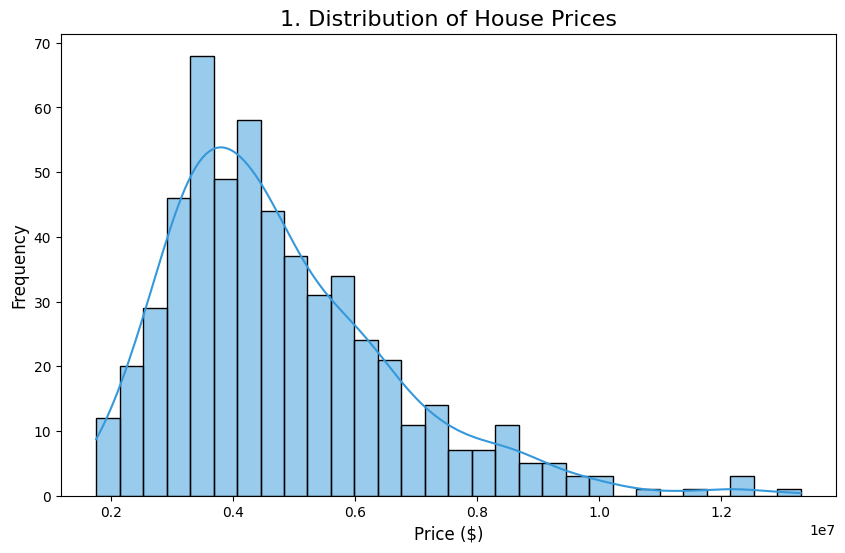

In [9]:
#Distribution of the Target Variable (Price)

plt.figure(figsize=(10, 6))
sns.histplot(data_house['price'], kde=True, bins=30, color='#3498db', edgecolor='black')
plt.title('1. Distribution of House Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

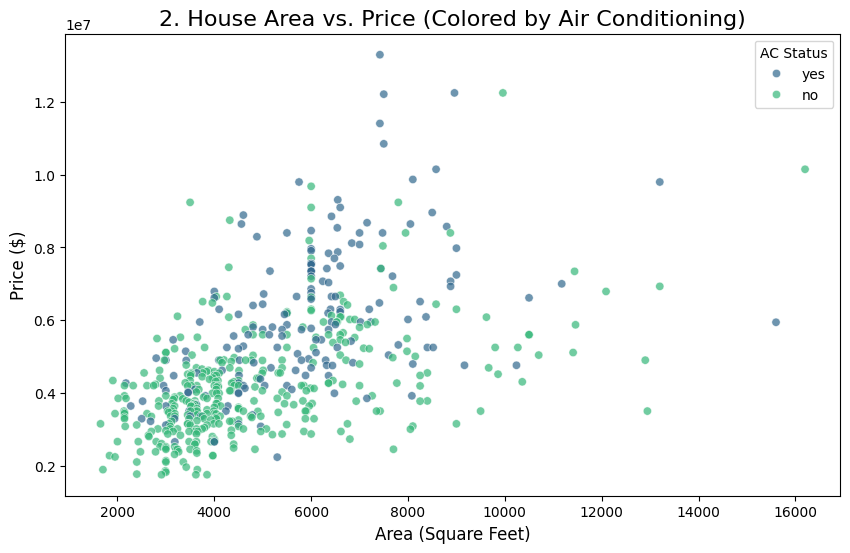

In [10]:
#Feature Relationship: Area vs. Price (Bivariate Analysis)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data_house, hue='airconditioning', palette='viridis', alpha=0.7)
plt.title('2. House Area vs. Price (Colored by Air Conditioning)', fontsize=16)
plt.xlabel('Area (Square Feet)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='AC Status')
plt.show()

In [54]:
#orrelation Heatmap (after initial numerical conversion for context)
# Temporarily map binary features for correlation calculation

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data_house[col] = data_house[col].map({'yes': 1, 'no': 0})


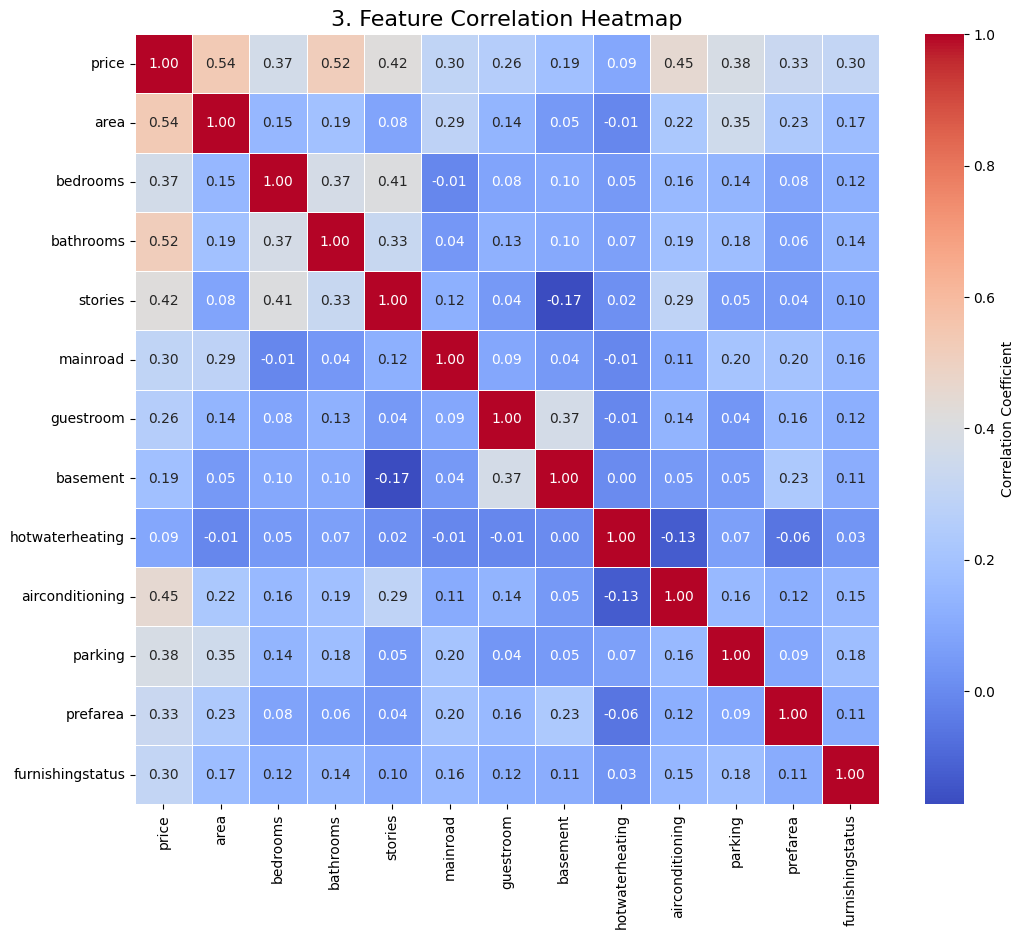

In [55]:

# Encode furnishing status numerically (Ordinal encoding is acceptable for correlation heatmap)
furnishing_map = {'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}
data_house['furnishingstatus'] = data_house['furnishingstatus'].map(furnishing_map)

plt.figure(figsize=(12, 10))
sns.heatmap(data_house.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('3. Feature Correlation Heatmap', fontsize=16)
plt.show()


#Data Preparation

In [56]:
# Separate target variable (y) from features (X)
X = data_house.drop('price', axis=1)
y = data_house['price']

In [57]:
#Encoding Binary Features (Yes/No)
X[binary_cols] = X[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

/tmp/ipython-input-3048759015.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X[binary_cols] = X[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


In [58]:
#One-Hot Encoding for Furnishing Status
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True, prefix='furnish')
print("After One-Hot Encoding, feature shape:", X.shape)


After One-Hot Encoding, feature shape: (545, 13)


In [59]:
nan_rows = X.isnull().any(axis=1).sum()
if nan_rows > 0:
    print(f"Cleaning {nan_rows} rows with NaNs...")
    clean_indices = X.dropna().index
    X = X.loc[clean_indices]
    y = y.loc[clean_indices]
    print(f"Clean up complete. Dataset now has {X.shape[0]} samples.")
else:
    print("No NaNs introduced during encoding. Data is clean ✅")

No NaNs introduced during encoding. Data is clean ✅


In [60]:
# Identify numerical columns for scaling (Area, Bedrooms, Bathrooms, Stories, Parking)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print("Numerical features have been scaled using StandardScaler.")

Numerical features have been scaled using StandardScaler.


In [61]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Data split: Training samples={X_train.shape[0]}, Testing samples={X_test.shape[0]}")

Data split: Training samples=381, Testing samples=164


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_lr = lr_model.predict(X_test)

In [63]:
# 3. Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance on Test Set:")
print(f"MAE: ${mae_lr:,.2f}")
print(f"RMSE: ${rmse_lr:,.2f}")
print(f"R^2: {r2_lr:.4f}")

Linear Regression Performance on Test Set:
MAE: $1,048,755.01
RMSE: $1,404,717.82
R^2: 0.5418


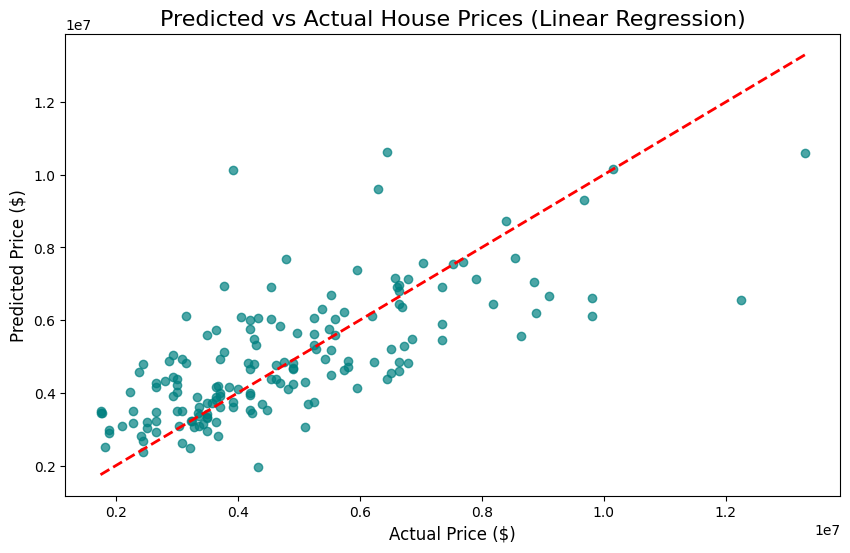

In [64]:
# 6. Visualization: Predicted vs Actual Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual House Prices (Linear Regression)', fontsize=16)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.show()

In [50]:
import joblib

# Save the trained model
joblib.dump(lr_model, "house_price_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [66]:
data_house.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,3
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,1


In [83]:
#  actual record (excluding price)
record = {
    "area": 7420,
    "bedrooms": 4,
    "bathrooms": 2,
    "stories": 3,
    "mainroad": 1,
    "guestroom": 0,
    "basement": 0,
    "hotwaterheating": 0,
    "airconditioning": 1,
    "parking": 2,
    "prefarea": 1,
    "furnish_2": 0,  # Semi-furnished
    "furnish_3": 1   # Furnished
}

# Convert to DataFrame (1 row)
X_input = pd.DataFrame([record])

# Scale numeric columns
numeric_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X_input[numeric_cols] = scaler.transform(X_input[numeric_cols])

# Predict price
predicted_price = lr_model.predict(X_input)[0]

print(f"Predicted House Price: ${predicted_price:,.2f}")
print("Actual Price: $13,300,000")

Predicted House Price: $7,846,249.21
Actual Price: $13,300,000


In [78]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

# Save model and scaler
joblib.dump(gbr, "house_price_gbr.pkl")
joblib.dump(scaler, "sc.pkl")
print("Model and scaler saved successfully.")

RMSE: $1,577,021.38
MAE: $1,109,142.53
RMSE: $1,577,021.38
Model and scaler saved successfully.


In [79]:
X_input = np.array([[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0, 1]])

# X_input shape should match training features (13 features in this case)
print("Input shape:", X_input.shape)
numeric_indices = [0, 1, 2, 3, 9]  # indices of numeric features
X_input[:, numeric_indices] = scaler.transform(X_input[:, numeric_indices])

predicted_price = gbr.predict(X_input)[0]
print(f"Predicted House Price: ${predicted_price:,.2f}")

Input shape: (1, 13)
Predicted House Price: $7,949,234.63


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_gbr = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: ${rmse:,.2f}")
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R^2: {r2:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RMSE: $1,453,491.68
MAE: $1,071,814.34
RMSE: $1,453,491.68
R^2: 0.5094
